## Ark Real Estate - Price Predictor


In [1]:
import pandas as pd


In [2]:
housing = pd.read_csv("dataark.csv")

In [3]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null int64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null int64
TAX        506 non-null int64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
MEDV       506 non-null float64
dtypes: float64(11), int64(3)
memory usage: 55.4 KB


In [5]:
housing['CHAS'].value_counts()

0    471
1     35
Name: CHAS, dtype: int64

In [6]:
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [7]:
%matplotlib inline

In [8]:
import matplotlib.pyplot as plt

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000026400230EB8>,
      dtype=object)

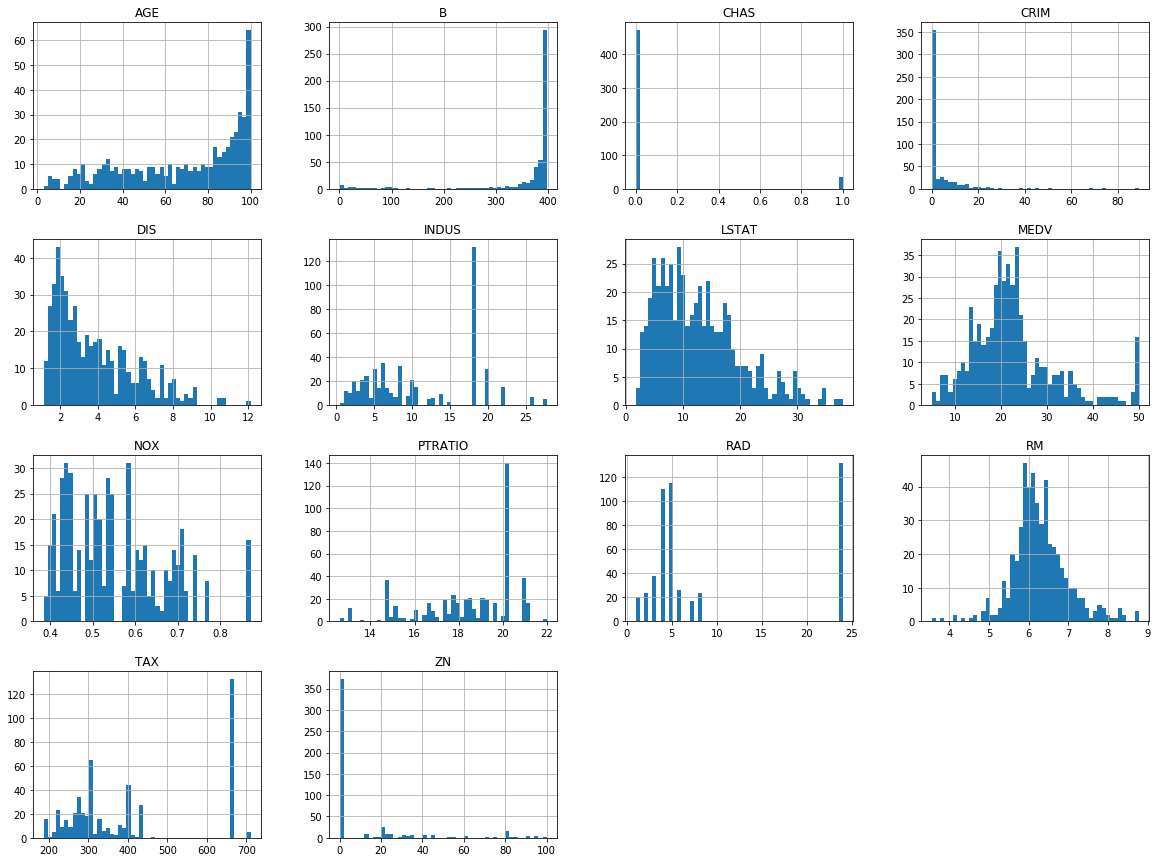

In [9]:
housing.hist(bins=50, figsize=(20,15))

 ## Train-Test Splitting

In [10]:
import numpy as np
def split_train_test(data,test_ratio):
    np.random.seed(23)
    shuffled = np.random.permutation(len(data))
    print(shuffled)
    test_set_size = int(len(data)*test_ratio)
    test_indices = shuffled[: test_set_size]
    train_indices = shuffled[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]
    

In [11]:
train_set, test_set = split_train_test(housing,0.2)

[176 311  94 139 232 411 122 344 275 226 475 348  66 168 319 155 190  88
 173 308 361 391 325  73 408 184 179 272 482 364 394 455 409 124 407 233
 165 183  34 258 148 382 143  14 370  46 156  45 440 268 502 384 135 421
 117 222 387 328 207 479 151 334 351 257 236 201 395 397 300 428 461 145
 330 452 123 138 380 332 383 292 172 114 353 413  63 339 276 267 158 450
  18 115 476 337 254 140 204 352  91 320 376 108 175 225  61  13 188  38
 377 402 480 396 266 327 185  82 456  59 313 110  86 465 442 100 367 375
 133 112 301 401 177  69 412  50 310 422 167  26 210 161 146 178 196 386
 342 231   2 213 373 437 281 263 481  97  51 293  27 490 474 366  43 484
 107 393  33   8  95 406  74 309 477 182 209 243 287 355 497 251 193 174
 468  77  30  58  29 217 343 101 494  44 489 270 189  75  84 314 238 445
 503 221 323 203 381 335  16 467 261  19  64 264 218  10 389 271  28 302
 505 307 362 349 131 472 458 371 119 195 296 134 392 462 274 147 208  72
 132 284  52 420   5 298 470 333 378 215 127 400  4

In [12]:
print(f"rows in train set: {len(train_set)}\nrows in test set: {len(test_set)}")

rows in train set: 405
rows in test set: 101


In [13]:
from sklearn.model_selection import train_test_split
train_set,test_set = train_test_split(housing,test_size=0.2,random_state=42)
print(f"rows in train set: {len(train_set)}\nrows in test set: {len(test_set)}")

rows in train set: 404
rows in test set: 102


In [14]:
from sklearn.model_selection import StratifiedShuffleSplit
split=StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)
for train_index,test_index in split.split(housing,housing['CHAS']):
    strat_train_set=housing.loc[train_index]
    strat_test_set=housing.loc[test_index]

In [15]:
strat_test_set['CHAS'].value_counts()

0    95
1     7
Name: CHAS, dtype: int64

In [16]:
strat_train_set['CHAS'].value_counts()

0    376
1     28
Name: CHAS, dtype: int64

## Looking for Correlations

In [17]:
corr_matrix = housing.corr()

In [18]:
corr_matrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.695360
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
AGE       -0.376955
RAD       -0.381626
CRIM      -0.388305
NOX       -0.427321
TAX       -0.468536
INDUS     -0.483725
PTRATIO   -0.507787
LSTAT     -0.737663
Name: MEDV, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002640161F208>,
      dtype=object)

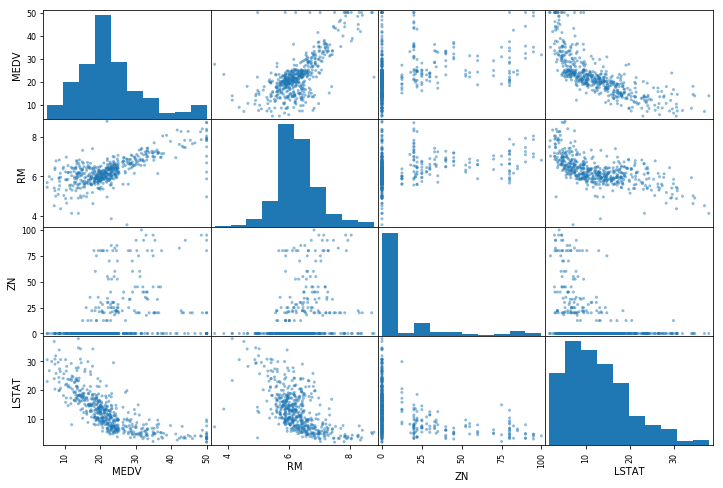

In [19]:
from pandas.plotting import scatter_matrix
attributes = ["MEDV","RM","ZN","LSTAT"]
scatter_matrix(housing[attributes], figsize=(12,8))

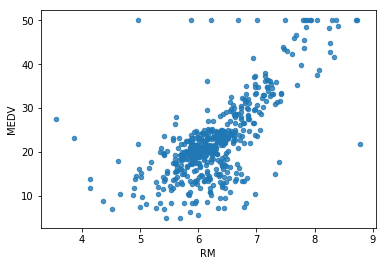

In [20]:
housing.plot(kind="scatter", x="RM",y="MEDV", alpha=0.8)

In [21]:
housing["TAXRM"]=housing['TAX']/housing['RM']

In [22]:
housing["TAXRM"]

0       45.019011
1       37.688834
2       33.681280
3       31.723350
4       31.061984
5       34.525661
6       51.729874
7       50.388853
8       55.229977
9       51.798801
10      48.769014
11      51.755700
12      52.810324
13      51.605312
14      50.360892
15      52.622557
16      51.727043
17      51.252087
18      56.268328
19      53.605727
20      55.116697
21      51.466890
22      49.983719
23      52.812661
24      51.823093
25      54.831220
26      52.812661
27      50.768976
28      47.267129
29      45.999401
          ...    
476    102.714374
477    125.565611
478    107.679871
479    106.919249
480    106.696572
481     98.666667
482     94.320918
483    115.584866
484    113.438937
485    105.513308
486    108.930324
487    112.785775
488    130.363036
489    131.326191
490    139.603377
491    118.836704
492    118.836704
493     68.512353
494     65.980425
495     68.959436
496     72.541744
497     67.483604
498     64.960957
499     70.210092
500     64

In [23]:
corr_matrix = housing.corr()
corr_matrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.695360
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
AGE       -0.376955
RAD       -0.381626
CRIM      -0.388305
NOX       -0.427321
TAX       -0.468536
INDUS     -0.483725
PTRATIO   -0.507787
TAXRM     -0.537650
LSTAT     -0.737663
Name: MEDV, dtype: float64

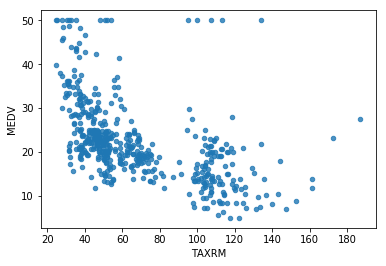

In [24]:
housing.plot(kind="scatter", x="TAXRM", y="MEDV", alpha=0.8)

In [25]:
housing = strat_train_set.drop("MEDV", axis=1)
housing_labels = strat_train_set["MEDV"].copy()

In [26]:
a = housing.dropna(subset=["RM"]) #Option 1
a.shape

(404, 13)

In [27]:
housing.drop("RM", axis=1).shape # Option 2
# Note that there is no RM column and also note that the original housing dataframe will remain unchanged

(404, 12)

In [28]:
median = housing["RM"].median() # Compute median for Option 3

In [29]:
housing["RM"].fillna(median) # Option 3
# Note that the original housing dataframe will remain unchanged

254    6.108
348    6.635
476    6.484
321    6.376
326    6.312
411    6.657
250    6.487
100    6.727
429    6.380
57     6.816
413    5.155
115    5.928
490    5.093
199    6.975
494    5.926
142    5.403
113    6.092
468    5.926
400    5.987
247    6.226
151    5.404
408    5.617
68     5.594
365    3.561
81     6.619
93     6.211
456    5.976
116    6.176
27     6.047
234    6.726
       ...  
433    6.436
430    6.348
479    6.229
438    5.935
38     5.966
18     5.456
97     8.069
266    7.014
133    5.822
449    6.417
477    5.304
171    5.880
180    7.765
158    6.066
279    6.812
109    6.229
82     6.302
386    4.652
418    5.957
126    5.613
446    6.341
101    6.781
277    6.826
405    5.683
367    3.863
155    6.152
423    6.103
98     7.820
455    6.525
216    5.888
Name: RM, Length: 404, dtype: float64

In [30]:
housing.shape

(404, 13)

In [31]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")
imputer.fit(housing)

SimpleImputer(copy=True, fill_value=None, missing_values=nan,
       strategy='median', verbose=0)

In [32]:
imputer.statistics_

array([2.86735e-01, 0.00000e+00, 9.90000e+00, 0.00000e+00, 5.38000e-01,
       6.21000e+00, 7.82000e+01, 3.12220e+00, 5.00000e+00, 3.37000e+02,
       1.90000e+01, 3.90955e+02, 1.15700e+01])

In [33]:
X = imputer.transform(housing)

In [34]:
housing_tr = pd.DataFrame(X, columns=housing.columns)

In [35]:
housing_tr.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.602814,10.836634,11.344950,0.069307,0.558064,6.279908,69.039851,3.746210,9.735149,412.341584,18.473267,353.392822,12.791609
std,8.099383,22.150636,6.877817,0.254290,0.116875,0.712983,28.258248,2.099057,8.731259,168.672623,2.129243,96.069235,7.235740
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000
25%,0.086963,0.000000,5.190000,0.000000,0.453000,5.878750,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,6.847500
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.210000,78.200000,3.122200,5.000000,337.000000,19.000000,390.955000,11.570000
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.630250,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,17.102500
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000


In [36]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
my_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    #     ..... add as many as you want in your pipeline
    ('std_scaler', StandardScaler()),
])


In [37]:
housing_num_tr = my_pipeline.fit_transform(housing)

In [38]:
housing_num_tr.shape

(404, 13)

## Selecting a desired  model for Ark real Estates

In [39]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
# model = LinearRegression()
# model = DecisionTreeRegressor()
model = RandomForestRegressor()
model.fit(housing_num_tr, housing_labels)

C:\Users\public\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [40]:
some_data = housing.iloc[:5]

In [41]:
prepared_data = my_pipeline.transform(some_data)

In [42]:
model.predict(prepared_data)

array([22.82, 24.3 , 16.09, 23.29, 23.57])

## evaluating the model

In [43]:
from sklearn.metrics import mean_squared_error
housing_predictions = model.predict(housing_num_tr)
mse = mean_squared_error(housing_labels, housing_predictions)
rmse = np.sqrt(mse)

In [44]:
mse

2.1576220297029702

## Using better evaluation technique - Cross Validation

In [45]:
# 1 2 3 4 5 6 7 8 9 10
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, housing_num_tr, housing_labels, scoring="neg_mean_squared_error", cv=10)
rmse_scores = np.sqrt(-scores)

In [46]:
rmse_scores

array([3.34593237, 2.69778003, 4.22760037, 2.69191427, 3.61443149,
       2.57743817, 4.56593473, 3.60956265, 3.38357319, 3.4937326 ])

In [47]:
def print_scores(scores):
    print("Scores:", scores)
    print("Mean: ", scores.mean())
    print("Standard deviation: ", scores.std())

In [48]:
print_scores(rmse_scores)

Scores: [3.34593237 2.69778003 4.22760037 2.69191427 3.61443149 2.57743817
 4.56593473 3.60956265 3.38357319 3.4937326 ]
Mean:  3.4207899860383
Standard deviation:  0.617493847668047



from joblib import dump, load
dump(model,'Ark.joblib') 

##Testing the model on test data

In [50]:
X_test = strat_test_set.drop("MEDV", axis=1)
Y_test = strat_test_set["MEDV"].copy()
X_test_prepared = my_pipeline.transform(X_test)
final_predictions = model.predict(X_test_prepared)
final_mse = mean_squared_error(Y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
# print(final_predictions, list(Y_test))

In [51]:
final_rmse

3.0758201520640207

In [52]:
prepared_data[0]

array([-0.43942006,  3.12628155, -1.12165014, -0.27288841, -1.42262747,
       -0.24141041, -1.31238772,  2.61111401, -1.0016859 , -0.5778192 ,
       -0.97491834,  0.41164221, -0.86091034])

## using the data

In [54]:
from joblib import dump, load
import numpy as np
model = load('Ark.joblib') 
features = np.array([[-5.43942006, 4.12628155, -1.6165014, -0.67288841, -1.42262747,
       -11.44443979304, -49.31238772,  7.61111401, -26.0016879 , -0.5778192 ,
       -0.97491834,  0.41164221, -66.86091034]])
model.predict(features)

array([23.96])